In [12]:
from fastai.vision import * 
from fastai.metrics import error_rate
import os 

In [13]:
bs = 64 #batch size

In [14]:
path_data = os.path.expanduser("~/Datasets/flower_photos")
print(path_data) #nice

/home/cedric/Datasets/flower_photos


In [17]:
data = ImageDataBunch.from_folder(path_data,ds_tfms =get_transforms(),size=224).normalize(imagenet_stats)

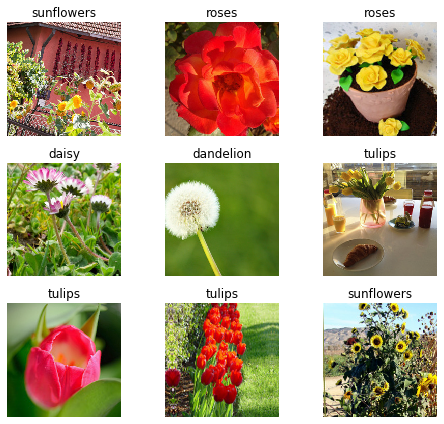

In [18]:
data.show_batch(rows=3, figsize=(7,6))

In [19]:
print(data.classes) #nice 

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [20]:
learn = cnn_learner(data,models.resnet50,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/cedric/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [21]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [22]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: CUDA out of memory. Tried to allocate 26.00 MiB (GPU 0; 3.95 GiB total capacity; 3.42 GiB already allocated; 12.69 MiB free; 3.45 GiB reserved in total by PyTorch)